# Artificial Beam Size Tests

** Scott Prahl**

** 16 Nov 2017, Version 2**

In [1]:
# Execute this cell first
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

# Artificial tests

These are all artificial tests.  A perfect beam is generated and then noise (and/or and offset) is added to the entire image.  Examples are shown in which the default algorithm works perfectly and also fails spectacularly.  

## Thresholding

Some words about how this works.

The beam_size algorithm works robustly for a variety of images.  As mentioned repeatedly in the literature, image artifacts outside the beam can cause dramatic errors in the ISO 11146 algorithm.  

One way to solve this problem is 

* First zero all pixels below a certain threshold.  Use the thresholded image to estimate the center and beam size.

* Second used the estimated values to create a mask around the beam (twice the diameter) and then reprocess the image. 

The second step allows one to use relatively large threshold that is very likely to truncate the shoulders of the original beam.  The second step includes the shoulders and therefore a better beam diameter can be obtained.



### Test 1 Simple, noise-free rotated elliptical beam

In this and all rest of the test functions, the maximum value in the test array is 256.

No gaussian noise, works fine!

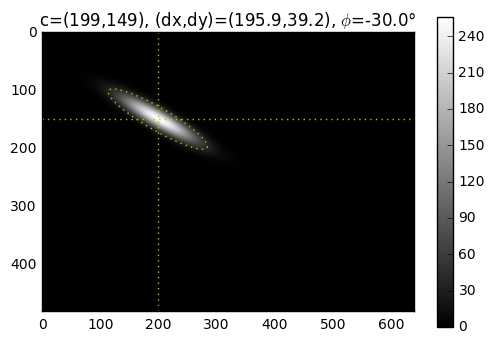

In [2]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)

### Test 2 Tiny bit (2%) gaussian noise

It still works!

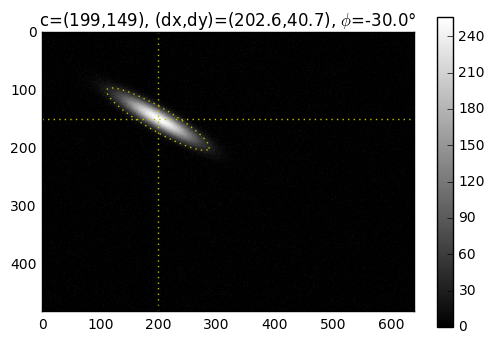

In [3]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,noise=5)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)

### 5% Gaussian Noise

The default settings do not work.  Need to increase the default threshold from 10% (0.10) to 20% (0.20)

yikes! pretty terrible with the default 10% threshold


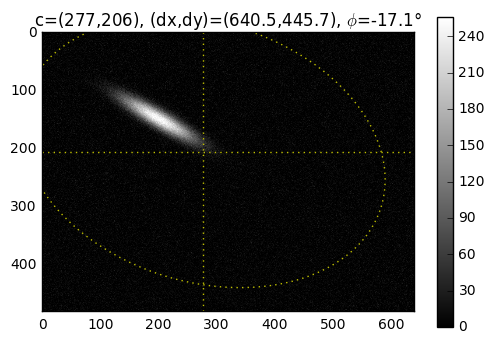

looks much better when the threshold is increased


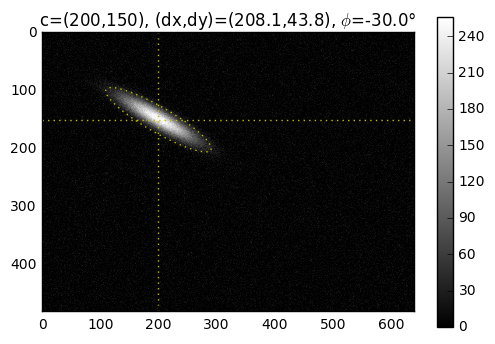

In [4]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

print('yikes! pretty terrible with the default 10% threshold')
test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,noise=13)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

print('looks much better when the threshold is increased')
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test, threshold=0.2)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)

### Add 5% constant offset to the entire image

This works fine.

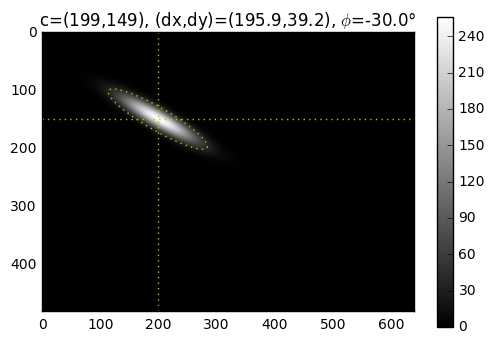

In [5]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480

test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,offset=13)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

### 5% gaussian noise and a 5% offset

This fails.  It doesn't work with threshold=0.2, instead need to increase the threshold to 0.3

not good


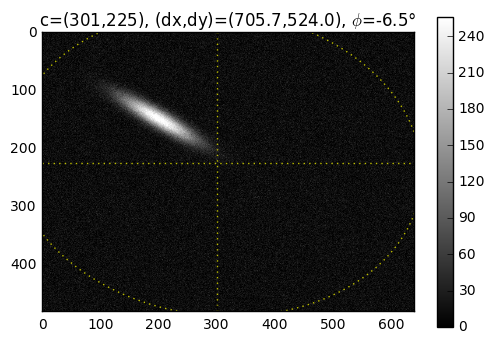

good


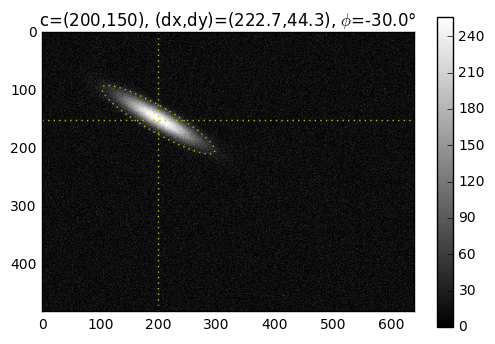

In [6]:
xc=200
yc=150
dx=200
dy=40
phi=-30*np.pi/180
h=640
v=480


print('not good')
test = lbs.beam_test_image(h,v,xc,yc,dx,dy,phi,offset=13,noise=13)
xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()

print('good')

xc_found, yc_found, dx_found, dy_found, phi_found = lbs.beam_size(test, threshold=0.3)
lbs.plot_image_and_ellipse(test,xc_found, yc_found, dx_found, dy_found, phi_found)
plt.show()